<a href="https://colab.research.google.com/github/Kim-Yeon-Jun/Transformer/blob/main/Tfch_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/rickiepark/nlp-with-transformers.git
%cd nlp-with-transformers
from install import *
install_requirements(chapter=2)

Cloning into 'nlp-with-transformers'...
remote: Enumerating objects: 600, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 600 (delta 12), reused 2 (delta 1), pack-reused 569
Receiving objects: 100% (600/600), 57.83 MiB | 16.43 MiB/s, done.
Resolving deltas: 100% (300/300), done.
/content/nlp-with-transformers
‚è≥ Installing base requirements ...
‚úÖ Base requirements installed!
Using transformers v4.33.3
Using datasets v2.14.5
Using accelerate v0.23.0
Using sentencepiece v0.1.99
Using umap v0.5.4
No GPU was detected! This notebook can be *very* slow without a GPU üê¢
Go to Runtime > Change runtime type and select a GPU hardware accelerator.


In [2]:
!pip install transformers
from transformers import pipeline
import pandas as pd
!pip install sentencepiece
import sentencepiece
!pip install datasets

In [3]:
from datasets import list_datasets

all_datasets = list_datasets()
print(f"ÌòÑÏû¨ ÌóàÎ∏åÏóêÎäî {len(all_datasets)}Í∞úÏùò Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ ÏûàÏäµÎãàÎã§.")
print(f"Ï≤òÏùå 10Í∞ú Îç∞Ïù¥ÌÑ∞ÏÖã : {all_datasets[:10]}")

<ipython-input-3-5c1a87cea912>:3: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


ÌòÑÏû¨ ÌóàÎ∏åÏóêÎäî 65541Í∞úÏùò Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ ÏûàÏäµÎãàÎã§.
Ï≤òÏùå 10Í∞ú Îç∞Ïù¥ÌÑ∞ÏÖã : ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa',
'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue',
'ajgt_twitter_ar', 'allegro_reviews']


In [4]:
from datasets import load_dataset

emotions = load_dataset("emotion")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [5]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [7]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [8]:
train_ds.column_names

['text', 'label']

In [9]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness',
'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [10]:
print(train_ds[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so
damned hopeful just from being around someone who cares and is awake', 'im
grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic
about the fireplace i will know that it is still on the property', 'i am feeling
grouchy'], 'label': [0, 0, 3, 2, 3]}


In [11]:
emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3

In [12]:
def label_int2str(row):
  return emotions["train"].features["label"].int2str(row)
df["label_name"] = df["label"].apply(label_int2str)
df.head()

text  label label_name
0                            i didnt feel humiliated      0    sadness
1  i can go from feeling so hopeless to so damned...      0    sadness
2   im grabbing a minute to post i feel greedy wrong      3      anger
3  i am ever feeling nostalgic about the fireplac...      2       love
4                               i am feeling grouchy      3      anger

In [13]:
!pip install matplotlib

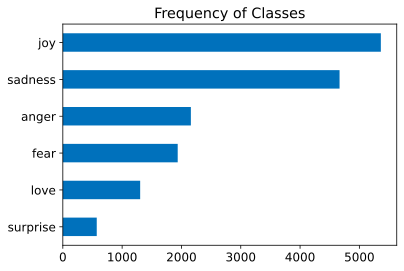

In [14]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

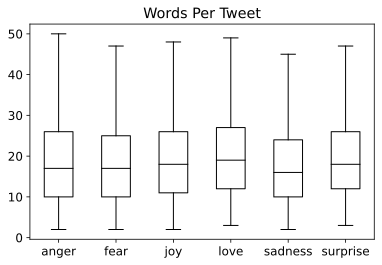

In [15]:
#Ìä∏Ïúó Í∏∏Ïù¥ ÌôïÏù∏
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by = "label_name", grid=False,
           showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [16]:
#Î¨∏Ïûê ÌÜ†ÌÅ∞Ìôî
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ',
'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o',
'f', ' ', 'N', 'L', 'P', '.']


In [17]:
#Ïñ¥ÌúòÏÇ¨Ï†ÑÏóê ÏûàÎäî Í∞Å Î¨∏ÏûêÎ•º Í≥†Ïú†Ìïú Ï†ïÏàòÎ°ú Î∞îÍæ∏Îäî Îß§Ìïë ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ±
#token2idxÎ•º ÏÇ¨Ïö©Ìï¥ ÌÜ†ÌÅ∞ÌôîÎêúÌÖçÏä§Ìä∏Î•º Ï†ïÏàò Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
token2idx = {ch:idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9,
'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18,
'z': 19}


In [18]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7,
14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [19]:
#Í∞Å Ïù¥Î¶ÑÏùÑ Í≥†Ïú†Ïùò ÏïÑÏù¥ÎîîÎ°ú Îß§Ìïë
categorical_df = pd.DataFrame(
    {"Name": ["Bumblebee", "Optimus Prime", "Megatron"], "Label ID":[0,1,2]})
categorical_df

Name  Label ID
0      Bumblebee         0
1  Optimus Prime         1
2       Megatron         2

In [20]:
#Ïõê-Ìï´ Î≤°ÌÑ∞
pd.get_dummies(categorical_df["Name"])

Bumblebee  Megatron  Optimus Prime
0          1         0              0
1          0         0              1
2          0         1              0

In [21]:
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [22]:
print(f"ÌÜ†ÌÅ∞ : {tokenized_text[0]}")
print(f"ÌÖêÏÑú Ïù∏Îç±Ïä§ : {input_ids[0]}")
print(f"Ïõê-Ìï´ Ïù∏ÏΩîÎî© : {one_hot_encodings[0]}")

ÌÜ†ÌÅ∞ : T
ÌÖêÏÑú Ïù∏Îç±Ïä§ : 5
Ïõê-Ìï´ Ïù∏ÏΩîÎî© : tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [23]:
#Îã®Ïñ¥ ÌÜ†ÌÅ∞Ìôî(Ï£ºÎ°ú ÏÇ¨Ïö©)
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


In [24]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [25]:
from transformers import DistilBertTokenizer
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [26]:
#Îã®Ïñ¥Î•º input_idsÌïÑÎìúÏóê ÏûàÎäî Í≥†Ïú†Ìïú Ï†ïÏàòÏóê Îß§Ìïë
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953,
2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [27]:
# CLS, SEP : ÏãúÌÄÄÏä§Ïùò Ï≤òÏùåÍ≥º ÎÅùÏùÑ ÏïåÎ†§Ï§å
# ÌÜ†ÌÅ∞Ïù¥ Î™®Îëê ÏÜåÎ¨∏ÏûêÌôî(Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏Ïùò ÌäπÏßï)
# '#'ÏùÄ Í≥µÎ∞±Ïù¥ ÏïÑÎãòÏùÑ ÏùòÎØ∏ÌïòÎäî Î¨∏Ïûê
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl',
'##p', '.', '[SEP]']


In [28]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [29]:
tokenizer.vocab_size

30522

In [30]:
tokenizer.model_max_length #Î™®Îç∏Ïùò ÏµúÎåÄ Î¨∏Îß• ÌÅ¨Í∏∞

512

In [31]:
tokenizer.model_input_names #Î™®Îç∏Ïù¥ Ï†ïÎ∞©Ìñ• Ìå®Ïä§ÏóêÏÑú Í∏∞ÎåÄÌïòÎäî ÌïÑÎìú Ïù¥Î¶Ñ

['input_ids', 'attention_mask']

In [32]:
#Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖã ÌÜ†ÌÅ∞Ìôî

#ÏÉòÌîåÏùÑ ÌÜ†ÌÅ∞ÌôîÌï† Ï≤òÎ¶¨ Ìï®Ïàò ÏÑ†Ïñ∏

def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True)

In [33]:
emotions = load_dataset("emotion")
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000,
2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300,
102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1]]}


In [34]:
tokens2ids = list(zip(tokenizer.all_special_tokens, tokenizer.all_special_ids))
data = sorted(tokens2ids, key=lambda x : x[-1])
df = pd.DataFrame(data, columns=["Special Token", "Special Token ID"])
df.T

0      1      2      3       4
Special Token     [PAD]  [UNK]  [CLS]  [SEP]  [MASK]
Special Token ID      0    100    101    102     103

In [35]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)
print(emotions_encoded["train"].column_names)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

['text', 'label', 'input_ids', 'attention_mask']


##ÌÖçÏä§Ìä∏ Î∂ÑÎ•ò Î™®Îç∏ ÌõàÎ†®


In [36]:
# Ìä∏ÎûúÏä§Ìè¨Î®∏Î•º ÌäπÏÑ± Ï∂îÏ∂úÍ∏∞Î°ú ÏÇ¨Ïö©ÌïòÍ∏∞
#ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú Î™®Îç∏ ÏÇ¨Ïö©
from transformers import AutoModel
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [37]:
#ÎßàÏßÄÎßâ ÏùÄÎãâ ÏÉÅÌÉú Ï∂îÏ∂ú(Ïù∏ÏΩîÎî©->ÌÜ†ÌÅ∞ÏùÑ ÌååÏù¥ÌÜ†Ïπò ÌÖêÏÑúÎ°ú Î≥ÄÌôò)
text = 'this is  a test'
inputs = tokenizer(text, return_tensors="pt")
print(f"ÏûÖÎ†• ÌÖêÏÑú ÌÅ¨Í∏∞ : {inputs['input_ids'].size()}")
#Í≤∞Í≥ºÎ°ú Ï∂úÎ†•ÎêòÎäî ÌÖêÏÑúÏùò ÌÅ¨Í∏∞ : [batch_size, n_tokens]

ÏûÖÎ†• ÌÖêÏÑú ÌÅ¨Í∏∞ : torch.Size([1, 6])


In [38]:
#ÏûÖÎ†• Ï†ÑÎã¨
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
  outputs=model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ...,
-0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]]),
hidden_states=None, attentions=None)


In [39]:
outputs.last_hidden_state.size()
#[batch_size, n_tokens, hidden_dim]
#n_tokensÍ∞úÏùò ÏûÖÎ†• ÌÜ†ÌÅ∞ÎßàÎã§ hidden_dimÍ∞ú Ï∞®ÏõêÏùò Î≤°ÌÑ∞Í∞Ä Î∞òÌôòÎêòÏóàÏùåÏùÑ ÏùòÎØ∏

torch.Size([1, 6, 768])

In [40]:
outputs.last_hidden_state[:,0].size()
torch.Size([1,768])

torch.Size([1, 768])

In [41]:
# ÏúÑÏùò ÏûëÏóÖÏùÑ Ìï®ÏàòÎ°ú Íµ¨ÏÑ±
def extract_hidden_states(batch):
  #Î™®Îç∏Ïùò ÏûÖÎ†•ÏùÑ GPUÎ°ú ÏòÆÍπÄ
  inputs = {k:v.to(device) for k,v in batch.items()
            if k in tokenizer.model_input_names}
  #ÎßàÏßÄÎßâ ÏùÄÎãâ ÏÉÅÌÉúÎ•º Ï∂îÏ∂úÌï©ÎãàÎã§.
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  #[CLS] ÌÜ†ÌÅ∞Ïóê ÎåÄÌïú Î≤°ÌÑ∞ Î∞òÌôò / Î∂ÑÎ•ò ÏûëÏóÖÏóêÏÑúÎäî Î≥¥ÌÜµ CLS ÌÜ†ÌÅ∞Ïóê Ïó∞Í¥ÄÎêú ÏùÄÎãâ ÏÉÅÌÉúÎ•º ÏûÖÎ†• ÌäπÏÑ±ÏúºÎ°ú ÏÇ¨Ïö©
  return {"hidden_state" : last_hidden_state[:,0].cpu().numpy()} # ÎßàÏßÄÎßâ ÏùÄÎãâ ÏÉÅÌÉúÎ•º CPUÎ°ú Îã§Ïãú Í∞ÄÏ†∏ÏôÄ ÎÑòÌååÏù¥ Î∞∞Ïó¥Î°ú Î∞îÍøà

In [42]:
#Î™®Îç∏Ïùò ÏûÖÎ†• ÏöîÍµ¨(ÌÖêÏÑú)Ïóê ÎßûÍ≤å input_idsÏôÄ attention_mask Ïó¥ÏùÑ  torch Ìè¨Îß∑ÏúºÎ°ú Î≥ÄÍ≤Ω
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [43]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [44]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [45]:
#ÌäπÏÑ±ÌñâÎ†¨ ÎßåÎì§Í∏∞
import numpy as np

X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [46]:
#ÌõàÎ†® ÏÑ∏Ìä∏ ÏãúÍ∞ÅÌôî
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

#ÌäπÏÑ± Ïä§ÏºÄÏùºÏùÑ [0,1] Î≤îÏúÑÎ°ú Ï°∞Ï†ï
X_scaled = MinMaxScaler().fit_transform(X_train)
#UMAP Í∞ùÏ≤¥Î•º ÏÉùÏÑ±ÌïòÍ≥† ÌõàÎ†®
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
#2D ÏûÑÎ≤†Îî©Ïùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÎßåÎì¶
df_emb = pd.DataFrame(mapper.embedding_, columns=["X","Y"])
df_emb["label"] = y_train
df_emb.head

<bound method NDFrame.head of               X         Y  label
0      4.067286  6.384014      0
1     -3.383334  5.451953      0
2      4.888896  3.141893      3
3     -2.577121  3.173195      2
4     -3.530936  3.503817      3
...         ...       ...    ...
15995 -0.739541  6.519917      0
15996 -2.297054  5.235008      0
15997 -2.629399  2.979714      1
15998  4.788328  3.418096      3
15999 -2.102141  5.059774      0

[16000 rows x 3 columns]>

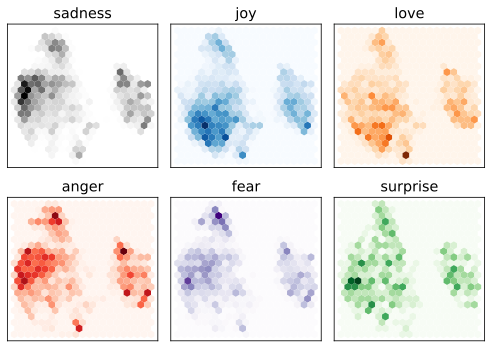

In [47]:
# ÌõàÎ†®ÏÑ∏Ìä∏ ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2,3,figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys","Blues","Oranges","Reds","Purples","Greens"]
labels = emotions["train"].features["label"].names

for i,(label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub = df_emb.query(f"label == {i}")
  axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap, gridsize=20, linewidths=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [48]:
#Í∞ÑÎã®Ìïú Î∂ÑÎ•ò Î™®Îç∏ ÌõàÎ†®(ÏÇ¨Ïù¥ÌÇ∑Îü∞ Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä)
from sklearn.linear_model import LogisticRegression

#ÏàòÎ†¥ÏùÑ Î≥¥Ïû•ÌïòÍ∏∞ ÏúÑÌï¥ max_iter Ï¶ùÍ∞ÄÏãúÌÇ¥
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.634

In [49]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

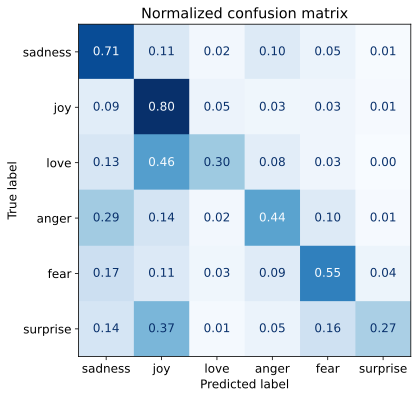

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6,6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

## Ìä∏ÎûúÏä§Ìè¨Î®∏ ÎØ∏ÏÑ∏ ÌäúÎãù

In [51]:
#ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú Î™®Îç∏ Î°úÎìú
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))

In [52]:
 # ÏÑ±Í≥µ ÏßÄÌëú Ï†ïÏùò
 from sklearn.metrics import accuracy_score, f1_score
 def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy":acc, "f1":f1}

##Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º Ï∏°Ï†ïÏßÄÌëú Ï§ÄÎπÑ->Trainer ÌÅ¥ÎûòÏä§ Ï†ïÏùò Ï†Ñ

ÌóàÍπÖÌéòÏù¥Ïä§ ÌóàÎ∏åÏóê Î°úÍ∑∏Ïù∏ Î∞è ÎØ∏ÏÑ∏ÌäúÎãùÌïú Î™®Îç∏ÏùÑ ÌóàÎ∏å Í≥ÑÏ†ïÏóê Ï†ÄÏû•ÌïòÍ≥† Ïª§ÎÆ§ÎãàÌã∞Ïóê Í≥µÏú†

ÌõàÎ†®ÏùÑ ÏúÑÌïú Î™®Îì† ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï†ïÏùò

In [59]:
# Î™®Îç∏ ÌõàÎ†®
from huggingface_hub import notebook_login

notebook_login()

In [60]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"])
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir = model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  save_strategy="epoch",
                                  load_best_model_at_end=True,
                                  log_level="error")

In [ ]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train()

In [ ]:
#predict() Î©îÏÑúÎìúÏùò Ï∂úÎ†•ÏùÄ PredictionOutput Í∞ùÏ≤¥Î°ú predictions, label_ids Î∞∞Ïó¥Í≥º Ìï®Íªò Trainer ÌÅ¥ÎûòÏä§Ïóê Ï†ÑÎã¨Ìï† Ï∏°Ï†ï ÏßÄÌëúÏùò Í∞íÎèÑ Îã¥Í≥† ÏûàÏùå.
#Í≤ÄÏ¶ùÏÑ∏Ìä∏Ïóê ÎåÄÌïú ÏßÄÌëú ÌôïÏù∏
preds_output = trainer.predict(emotions_encoded["validation"])

In [ ]:
y_preds = np.argmax(preds_output.predictions, axis=1)

In [ ]:
plot_confusion_matrix(y_preds, y_valid, labels)

In [ ]:
#Ïò§Î•òÎ∂ÑÏÑù(Î™®Îç∏Ïùò ÏÜêÏã§ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Í≤ÄÏ¶ù ÏÉòÌîåÏùÑ Ï†ïÎ†¨ - Ï†ïÎ∞©Ìñ• Ìå®Ïä§Ïùò Í≤∞Í≥ºÏôÄ Î†àÏù¥Î∏î ÏÇ¨Ïö©)
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
  #Î™®Îì† ÏûÖÎ†• ÌÖêÏÑúÎ•º Î™®Îç∏Í≥º Í∞ôÏùÄ Ïû•ÏπòÎ°ú Ïù¥Îèô
  inputs = {k:v.to(device) for k,v in batch.items()
    if k in tokenizer.model_input_names}
  with torch.no_grad():
    output = model(**inputs)
    pred_label = torch.argmax(output.logits, axis=1)
    loss = cross_entropy(output.logits, batch["label"].to(device),reduction="none")

  #Îã§Î•∏ Îç∞Ïù¥ÌÑ∞ÏÖã Ïó¥Í≥º Ìò∏ÌôòÎêòÎèÑÎ°ù Ï∂úÎ†•ÏùÑ CPUÎ°ú ÏòÆÍπÄ
  return {"loss": loss.cpu().numpy(),
          "predicted_label":pred_label.cpu().numpy()}


In [ ]:
#map() Î©îÏÑúÎìúÎ•º ÌÜµÌï¥ Ïù¥ Ìï®ÏàòÎ•º Ï†ÅÏö©ÏãúÏºú Î™®Îì† ÏÉòÌîåÏùò ÏÜêÏã§ÏùÑ Íµ¨Ìï®
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])
#ÏÜêÏã§Í∞í Í≥ÑÏÇ∞
emotions_encoded["validation"] = emotions_encoded["validation"].map(forward_pass_with_label, batched=True, batch_size=16)

In [ ]:
#DataFrame ÏÉùÏÑ±
emotions_encoded.set_format("pandas")
cols = ["text","label","predicted_label","loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"]=df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"].apply(label_int2str))

In [ ]:
#ÏÜêÏã§Ïù¥ Í∞ÄÏû• ÎÜíÏùÄ Îç∞Ïù¥ÌÑ∞
df_test.sort_values("loss", ascending=False).head(10)

In [ ]:
#ÏÜêÏã§Ïù¥ Í∞ÄÏû• ÎÇÆÏùÄ Îç∞Ïù¥ÌÑ∞
df_test.sort_values("loss", ascending=True).head(10)

In [ ]:
#ÌõàÎ†®Îêú Î™®Îç∏Ïùò Ï†ÄÏû• Î∞è Í≥µÏú†
trainer.push_to_hub(commit_message="Training completerd!")

In [ ]:
#ÌóàÎ∏åÏóê ÏóÖÎ°úÎìú Îêú Î™®Îç∏ ÏÇ¨Ïö©
from transformers import pipeline
model_id = "Yinfj/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)

In [ ]:
#ÌååÏù¥ÌîÑÎùºÏù∏ ÌÖåÏä§Ìä∏
custom_tweet = "I saw a movie today and it was really good."
preds = classifier(custon_tweet, return_all_scores=True)

In [ ]:
#Í∞Å ÌÅ¥ÎûòÏä§Ïùò ÌôïÎ•†ÏùÑ Í∑∏ÎûòÌîÑÎ°ú Ï∂úÎ†•
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()

Name: transformers
Version: 4.33.3
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: 
